# Task 3: Handwritten Character Recognition

Create a handwritten character recognition system that can recognize various handwritten characters or
alphabets. You can extend this to recognize entire words or sentences.

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

MNIST dataset consists of a collection of handwritten digits from 0 to 9.

In [2]:
# Loading the MNIST dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

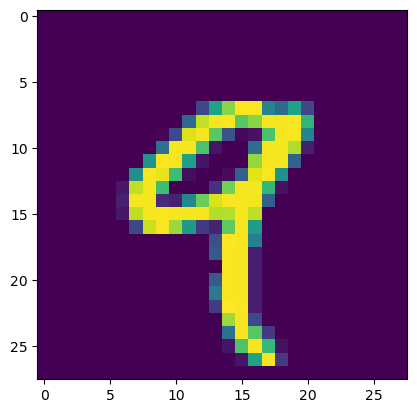

In [6]:
# visualising handwritten image in training set
import matplotlib.pyplot as plt
plt.imshow(X_train[4]) 

In [7]:
# Normalizing pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
X_train[4]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
# Neural network model

from keras.models import Sequential
from keras.layers import Flatten, Dense

# Create a Sequential model
model = Sequential()

# Flatten layer to convert input images to 1D array
model.add(Flatten(input_shape=(28,28)))

# Dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Dense layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer with 10 neurons for 10 classes using softmax activation
model.add(Dense(10, activation='softmax'))


In [10]:
# summary of the neural network model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# configureing the model for training
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2840 - accuracy: 0.9160 - val_loss: 0.1396 - val_accuracy: 0.9598
Epoch 2/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1205 - accuracy: 0.9642 - val_loss: 0.1213 - val_accuracy: 0.9624
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0829 - accuracy: 0.9746 - val_loss: 0.1179 - val_accuracy: 0.9640
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0631 - accuracy: 0.9803 - val_loss: 0.0917 - val_accuracy: 0.9731
Epoch 5/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0487 - accuracy: 0.9848 - val_loss: 0.0988 - val_accuracy: 0.9741
Epoch 6/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0388 - accuracy: 0.9875 - val_loss: 0.1015 - val_accuracy: 0.9721
Epoch 7/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.1026 - val_accur

In [14]:
# Predictions
y_probability = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [16]:
# Getting the indices of the highest probability in each row
import numpy as np
y_predicited = np.argmax(y_probability, axis=1)

In [17]:
# Accuracy score of the model's predictions on the test set

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predicited)
print("Accuracy:", accuracy)


Accuracy: 0.9748


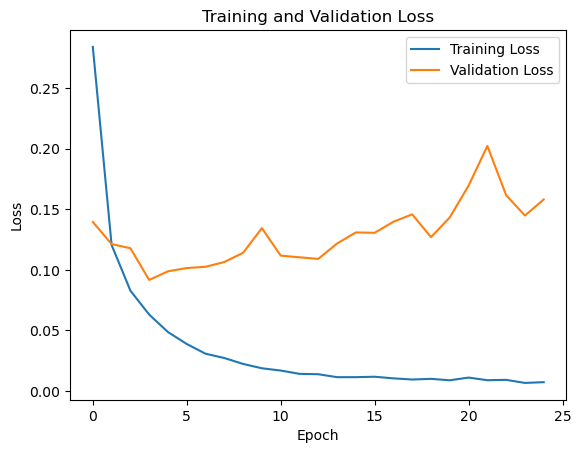

In [22]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

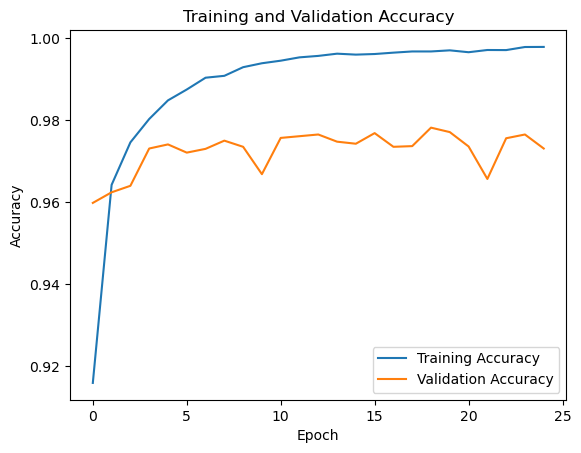

In [23]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


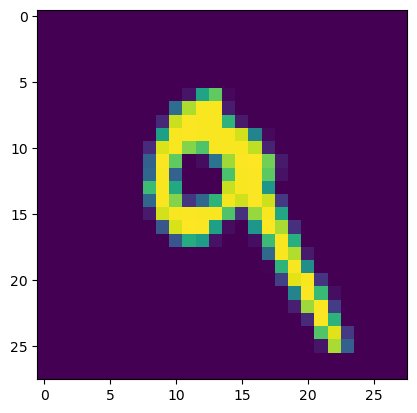

In [33]:
# displaying an image from the test set
plt.imshow(X_test[7])

In [34]:
# Reshaping the image to match the input shape expected by the model
image = X_test[7].reshape(1, 28, 28)

# Making predictions on the image
predictions = model.predict(image)

# Getting the index of the class with the highest probability
predicted_class_index = predictions.argmax(axis=1)

print("Predicted class index:", predicted_class_index)


1/1 [==============================] - 0s 46ms/step
Predicted class index: [9]


This means that, based on the features extracted from the input image, the model believes that the handwritten digit in the image is most likely to be the digit 9. Which meansthe model predicts the digit in the image at index 7 of the test set to be 9.

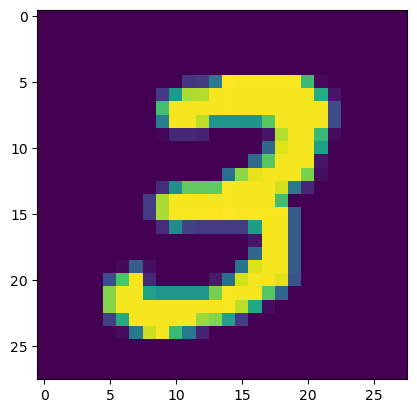

In [35]:
# displaying an image from the training set
plt.imshow(X_train[7])

In [36]:
# Reshaping the image to match the input shape expected by the model
image = X_train[7].reshape(1, 28, 28)

# Making predictions on the image
predictions = model.predict(image)

# Getting the index of the class with the highest probability
predicted_class_index = predictions.argmax(axis=1)

print("Predicted class index:", predicted_class_index)


1/1 [==============================] - 0s 51ms/step
Predicted class index: [3]


The model predicts the digit in the image at index 7 of the train set to be 3.

In [42]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [45]:
import cv2
import pytesseract

# Load the handwritten image
image = cv2.imread('hqdefault.jpg')

# Use pytesseract to perform OCR with language set to English
recognized_text = pytesseract.image_to_string(image, lang='eng', config='--psm 6')

# Print the recognized text
print("Recognized Text:", recognized_text)


Recognized Text: A-teachers purpose
should not _betorcreate
{students in



Optical character recognition (OCR) on the image using the pytesseract library, and prints the recognized text extracted from the image.